In [48]:
#Goal: visualize and explore the crash data.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium
from folium.plugins import HeatMap

In [23]:
df = pd.read_csv('../data/cleaned_crash_data.csv')
df.head()

,NumberOfVehicles,CrashDate,CrashTime,DayOfWeek,TypeOfCollision,LocationOfFirstHarmfulEvent,RoadwaySurfaceType,RoadwayDefect,LightCondition_Category,LightCondition_Value,...,DistractedDriverFatalities,DistractedDriverInjuries,UnrestrainedInjuries,Number_Of_Fatalities,Number_Of_Injuries,Crash_UID,Is_Fatal,Is_Severe,Is_Minor,SeverityLabel
0,2,2022-01-03,23:33:00,Monday,Angle,On Roadway,"Blacktop, Asphalt, Bituminous",Slick Pavement,Darkness,Darkness - Road Lighted,...,0,0,0,0,2,c7926678,0,1,0,Severe
1,2,2022-01-03,08:04:00,Monday,Angle,On Roadway,"Blacktop, Asphalt, Bituminous",No Defects,Daylight,Daylight,...,0,1,0,0,2,c0416322,0,1,0,Severe
2,2,2022-01-03,09:39:00,Monday,Angle,On Roadway,"Blacktop, Asphalt, Bituminous",No Defects,Daylight,Daylight,...,0,0,0,0,0,c6336000,0,0,1,Minor
3,2,2022-01-03,15:35:00,Monday,Angle,On Roadway,"Blacktop, Asphalt, Bituminous",Slick Pavement,Daylight,Daylight,...,0,0,0,0,0,c7354392,0,0,1,Minor
4,2,2022-01-04,08:40:00,Tuesday,Angle,On Roadway,"Blacktop, Asphalt, Bituminous",No Defects,Daylight,Daylight,...,0,0,0,0,0,c0936986,0,0,1,Minor


In [24]:
df.info()
df.describe(include='all')
df.isnull().sum().sort_values(ascending=False).head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379234 entries, 0 to 379233
Data columns (total 78 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   NumberOfVehicles                 379234 non-null  int64  
 1   CrashDate                        379234 non-null  object 
 2   CrashTime                        379234 non-null  object 
 3   DayOfWeek                        379234 non-null  object 
 4   TypeOfCollision                  379234 non-null  object 
 5   LocationOfFirstHarmfulEvent      379234 non-null  object 
 6   RoadwaySurfaceType               379234 non-null  object 
 7   RoadwayDefect                    379234 non-null  object 
 8   LightCondition_Category          379234 non-null  object 
 9   LightCondition_Value             379234 non-null  object 
 10  RoadwayDescription               379234 non-null  object 
 11  WorkZoneLocation                 379234 non-null  object 
 12  We

TownName                    356692
SecondaryLocation           202522
RouteNumber                  42659
Interstate_NonInterstate     10786
FunctionalClassCode          10786
MileMarker                    2606
RoadName                      2555
AtIntersection                  31
RouteName                       31
Latitude                         5
dtype: int64

In [64]:
cause_columns = [
    'AlcoholInvolved',
    'SpeedRelated',
    'DistractedDriverInvolved',
    'DriverTextingInvolved',
    'DriverUsingCellPhone'
]

for col in cause_columns:
    print(f"\nValue counts for '{col}':")
    print(df[col].value_counts(dropna=False))



Value counts for 'AlcoholInvolved':
AlcoholInvolved
No     358579
Yes     20655
Name: count, dtype: int64

Value counts for 'SpeedRelated':
SpeedRelated
No     303387
Yes     75847
Name: count, dtype: int64

Value counts for 'DistractedDriverInvolved':
DistractedDriverInvolved
No     316275
Yes     62959
Name: count, dtype: int64

Value counts for 'DriverTextingInvolved':
DriverTextingInvolved
No     378818
Yes       416
Name: count, dtype: int64

Value counts for 'DriverUsingCellPhone':
DriverUsingCellPhone
No     374661
Yes      4573
Name: count, dtype: int64


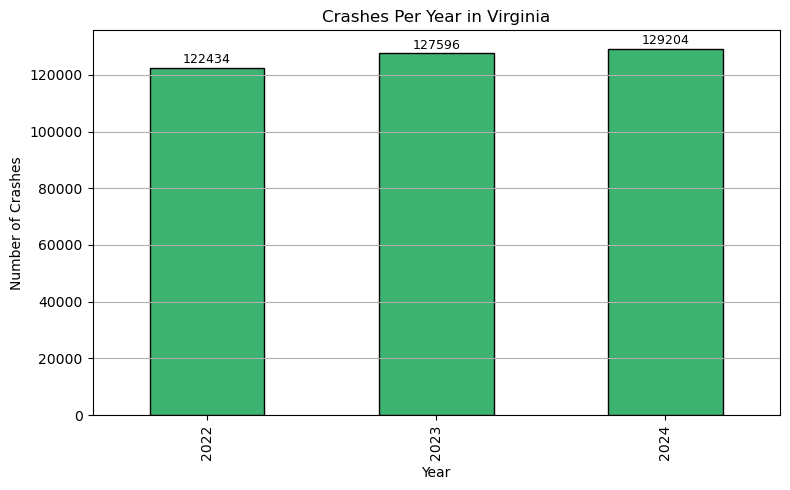

In [161]:
crashes_per_year = df['Year'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
bars = crashes_per_year.plot(kind='bar', color='mediumseagreen', edgecolor='black')

for i, value in enumerate(crashes_per_year):
    plt.text(i, value + 500, str(value), ha='center', va='bottom', fontsize=9)

plt.title('Crashes Per Year in Virginia')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


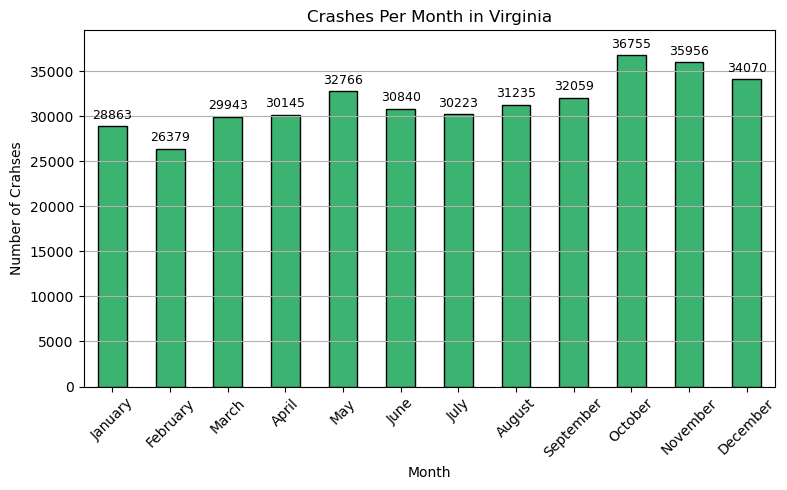

In [278]:
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

crashes_per_month = df['MonthName'].value_counts().reindex(month_order, fill_value=0)

plt.figure(figsize=(8,5))
bars = crashes_per_month.plot(kind='bar', color='mediumseagreen', edgecolor='black')

for i, value in enumerate(crashes_per_month):
    plt.text(i, value + 500, str(value), ha='center', va='bottom', fontsize=9)

plt.ylim(0, crashes_per_month.max() * 1.075)

plt.title('Crashes Per Month in Virginia')
plt.ylabel('Number of Crahses')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

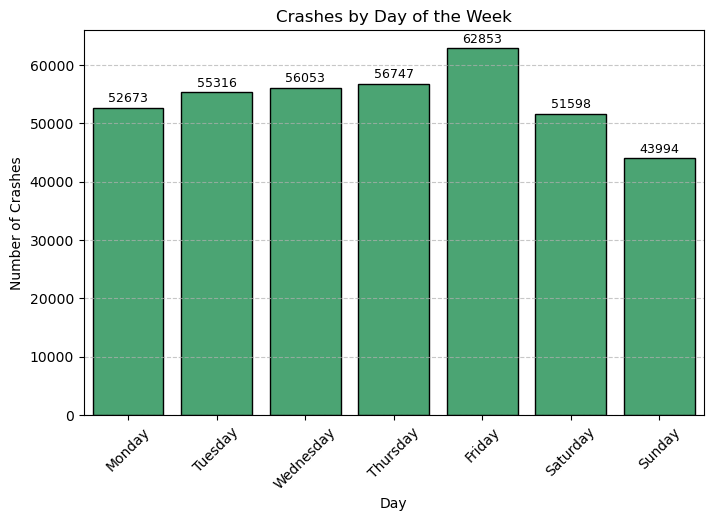

In [191]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
crashes_by_day = df['DayOfWeek'].value_counts().reindex(day_order)

plt.figure(figsize=(8, 5))
sns.barplot(x=crashes_by_day.index, y=crashes_by_day.values, color='mediumseagreen', edgecolor='black')
plt.title('Crashes by Day of the Week')
plt.xlabel('Day')
for i, value in enumerate(crashes_by_day):
    plt.text(i, value + 500, str(value), ha='center', va='bottom', fontsize=9)
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

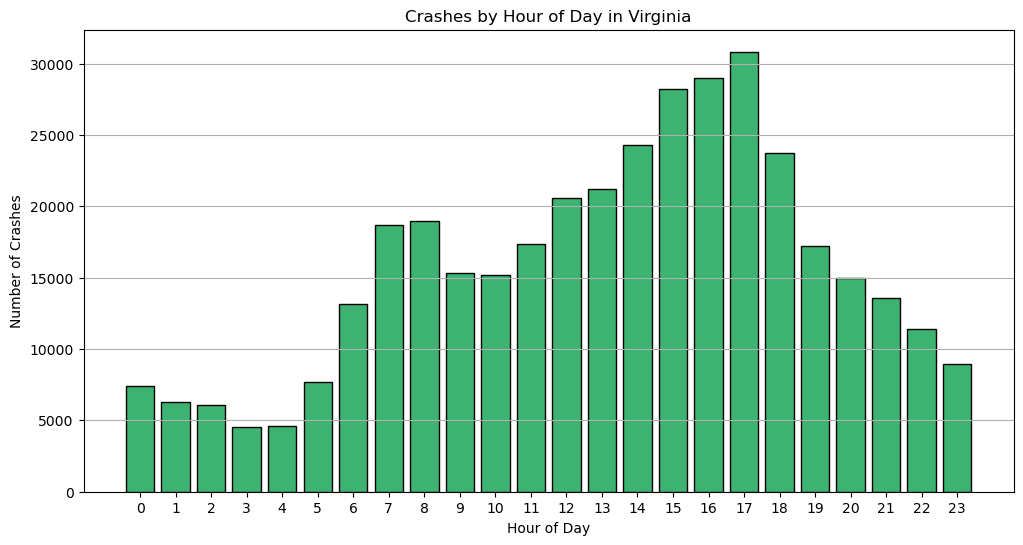

In [203]:
crashes_per_hour = df['Hour'].value_counts().sort_index()

viridis = sns.color_palette("viridis", n_colors=12)


plt.figure(figsize=(12, 6))
plt.bar(crashes_per_hour.index, crashes_per_hour.values, color='mediumseagreen', edgecolor='black')
plt.xticks(range(24))
plt.xlabel('Hour of Day')
plt.ylabel('Number of Crashes')
plt.title('Crashes by Hour of Day in Virginia')
plt.grid(axis='y')
plt.show()



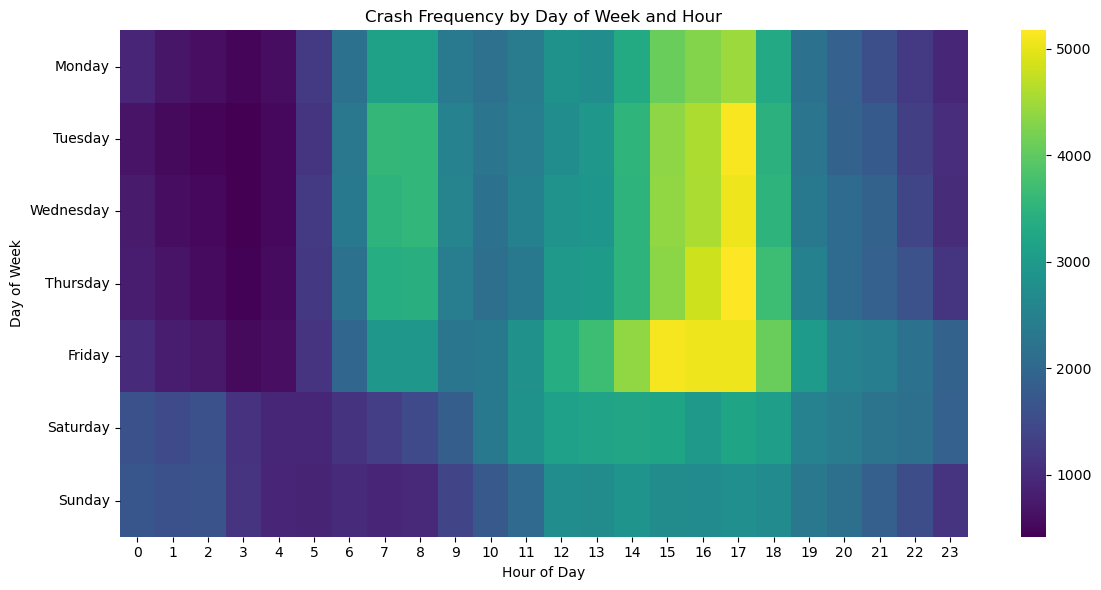

In [213]:
heat_data = pd.crosstab(df['DayOfWeek'], df['Hour'])

ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heat_data = heat_data.reindex(ordered_days)

plt.figure(figsize=(12, 6))
sns.heatmap(heat_data, cmap='viridis')
plt.title('Crash Frequency by Day of Week and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()

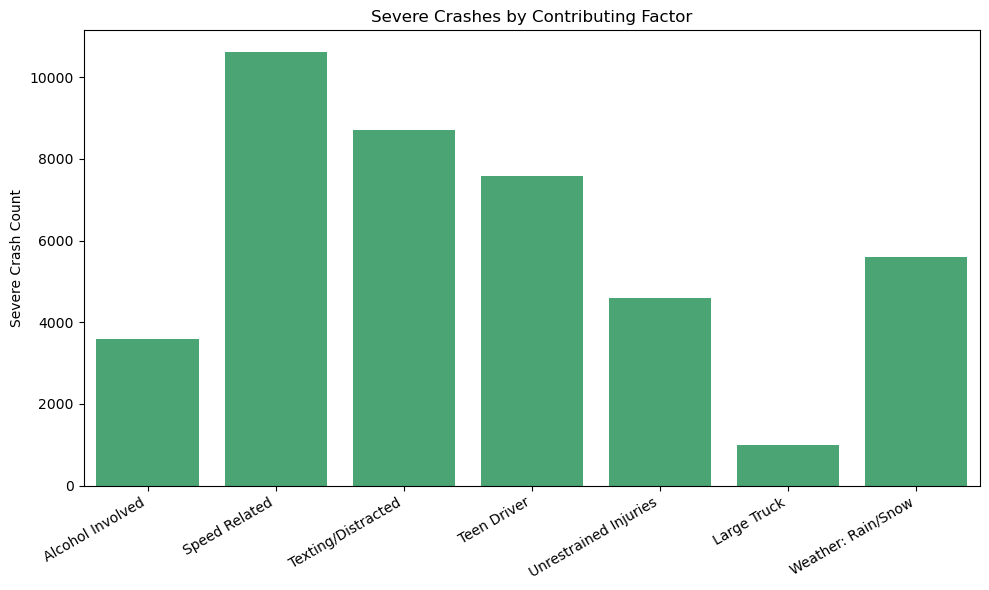

In [247]:
factors = {
    'Alcohol Involved': df[df['AlcoholInvolved'] == 'Yes']['Is_Severe'].sum(),
    'Speed Related': df[df['SpeedRelated'] == 'Yes']['Is_Severe'].sum(),
    'Texting/Distracted': df[
        (df['DriverTextingInvolved'] == 'Yes') | (df['DistractedDriverInvolved'] == 'Yes')
    ]['Is_Severe'].sum(),
    'Teen Driver': df[df['TeenDriverInvolved'] == 'Yes']['Is_Severe'].sum(),
    'Unrestrained Injuries': df[df['UnrestrainedInjuries'].astype(int) > 0]['Is_Severe'].sum(),
    'Large Truck': df[df['LargeTruckInvolved'] == 'Yes']['Is_Severe'].sum(),
    'Weather: Rain/Snow': df[
        df['WeatherCondition'].isin(['Rain', 'Snow', 'Sleet', 'Freezing Rain'])
    ]['Is_Severe'].sum()
}

plt.figure(figsize=(10, 6))
sns.barplot(x=list(factors.keys()), y=list(factors.values()), color = 'mediumseagreen')
plt.xticks(rotation=30, ha='right')
plt.ylabel('Severe Crash Count')
plt.title('Severe Crashes by Contributing Factor')
plt.tight_layout()
plt.show()


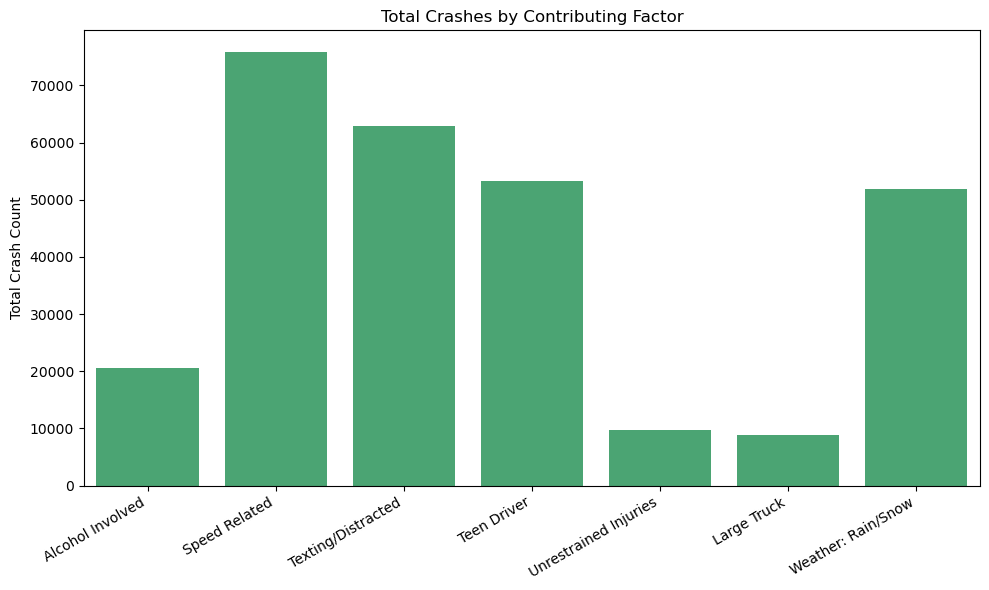

In [245]:
total_factors = {
    'Alcohol Involved': (df['AlcoholInvolved'] == 'Yes').sum(),
    'Speed Related': (df['SpeedRelated'] == 'Yes').sum(),
    'Texting/Distracted': (
        (df['DriverTextingInvolved'] == 'Yes') | (df['DistractedDriverInvolved'] == 'Yes')
    ).sum(),
    'Teen Driver': (df['TeenDriverInvolved'] == 'Yes').sum(),
    'Unrestrained Injuries': (df['UnrestrainedInjuries'].astype(int) > 0).sum(),
    'Large Truck': (df['LargeTruckInvolved'] == 'Yes').sum(),
    'Weather: Rain/Snow': df['WeatherCondition'].isin(
        ['Rain', 'Snow', 'Sleet', 'Freezing Rain']
    ).sum()
}

plt.figure(figsize=(10, 6))
sns.barplot(x=list(total_factors.keys()), y=list(total_factors.values()), color= 'mediumseagreen')
plt.xticks(rotation=30, ha='right')
plt.ylabel('Total Crash Count')
plt.title('Total Crashes by Contributing Factor')
plt.tight_layout()
plt.show()

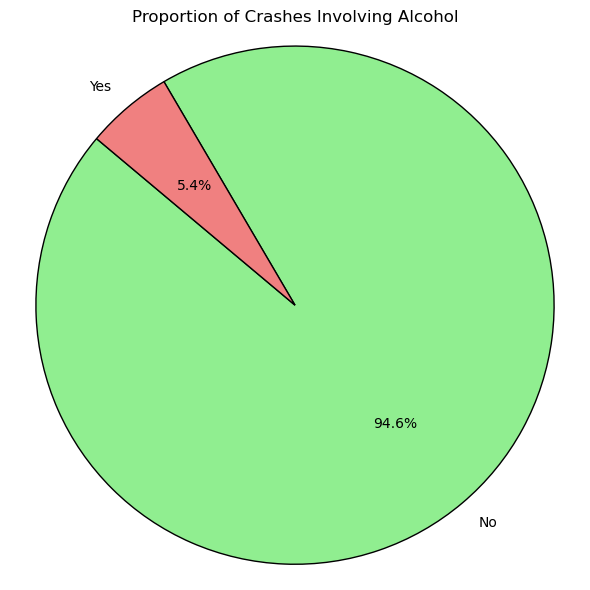

In [173]:
import matplotlib.pyplot as plt

alcohol_counts = df['AlcoholInvolved'].value_counts()

labels = alcohol_counts.index
sizes = alcohol_counts.values
colors = ['lightgreen', 'lightcoral']

plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'black'}
)

plt.title('Proportion of Crashes Involving Alcohol')
plt.axis('equal')
plt.tight_layout()
plt.show()

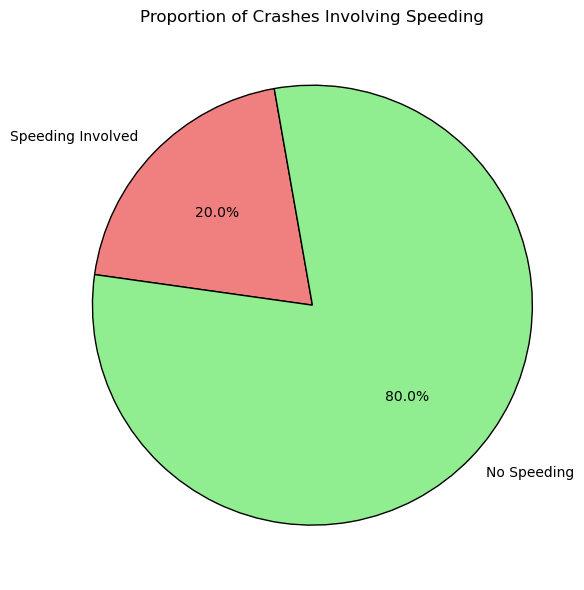

In [181]:
total_crashes = len(df)

speeding_crashes = df[df['SpeedRelated'] == 'Yes']
speeding_count = len(speeding_crashes)

speed_labels = ['Speeding Involved', 'No Speeding']
speed_sizes = [speeding_count, total_crashes - speeding_count]
colors = ['lightcoral','lightgreen']

plt.figure(figsize=(6, 6))
plt.pie(
    speed_sizes,
    labels=speed_labels,
    autopct='%1.1f%%',
    startangle=100,
    colors=colors,
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Proportion of Crashes Involving Speeding')
plt.axis('equal')
plt.tight_layout()
plt.show()

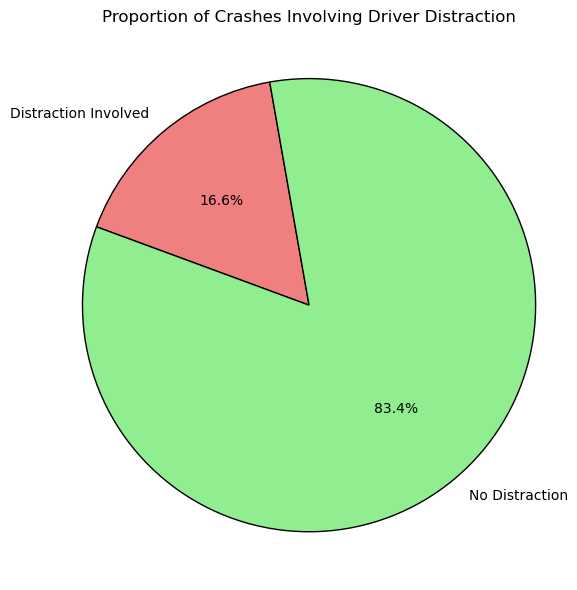

In [183]:
df['AnyDistraction'] = (
    (df['DistractedDriverInvolved'] == 'Yes') |
    (df['DriverTextingInvolved'] == 'Yes')
)

distraction_count = df['AnyDistraction'].sum()

distraction_labels = ['Distraction Involved', 'No Distraction']
distraction_sizes = [distraction_count, total_crashes - distraction_count]
colors = ['lightcoral', 'lightgreen']

plt.figure(figsize=(6, 6))
plt.pie(
    distraction_sizes,
    labels=distraction_labels,
    autopct='%1.1f%%',
    startangle=100,
    colors=colors,
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Proportion of Crashes Involving Driver Distraction')
plt.axis('equal')
plt.tight_layout()
plt.show()

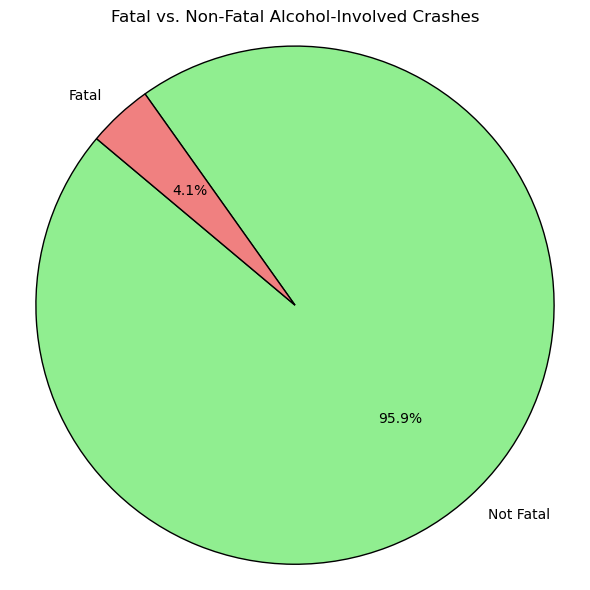

In [187]:
alcohol_df = df[df['AlcoholInvolved'] == 'Yes']
fatal_counts = alcohol_df['Is_Fatal'].value_counts().sort_index()

labels = ['Not Fatal', 'Fatal']
sizes = [fatal_counts.get(0, 0), fatal_counts.get(1, 0)]
colors = ['lightgreen', 'lightcoral']


plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'black'}
)

plt.title('Fatal vs. Non-Fatal Alcohol-Involved Crashes')
plt.axis('equal')
plt.tight_layout()
plt.show()

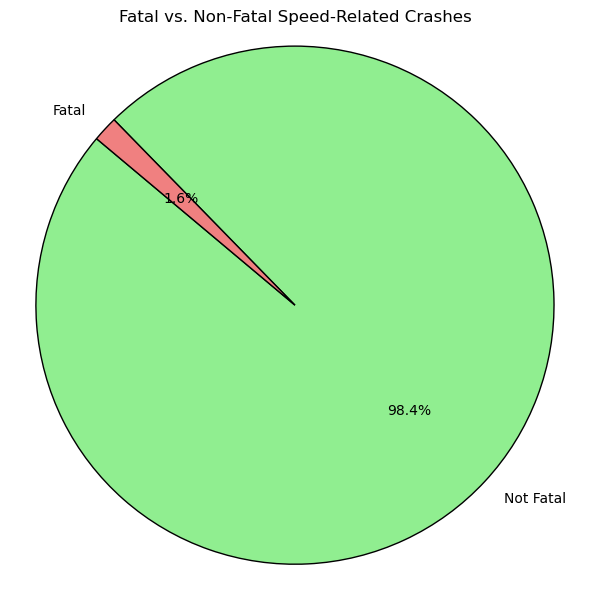

In [195]:
speed_df = df[df['SpeedRelated'] == 'Yes']
speed_fatal_counts = speed_df['Is_Fatal'].value_counts().sort_index()

labels = ['Not Fatal', 'Fatal']
sizes = [speed_fatal_counts.get(0, 0), speed_fatal_counts.get(1, 0)]
colors = ['lightgreen', 'lightcoral']  # Same color scheme

plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'black'}
)

plt.title('Fatal vs. Non-Fatal Speed-Related Crashes')
plt.axis('equal')
plt.tight_layout()
plt.show()


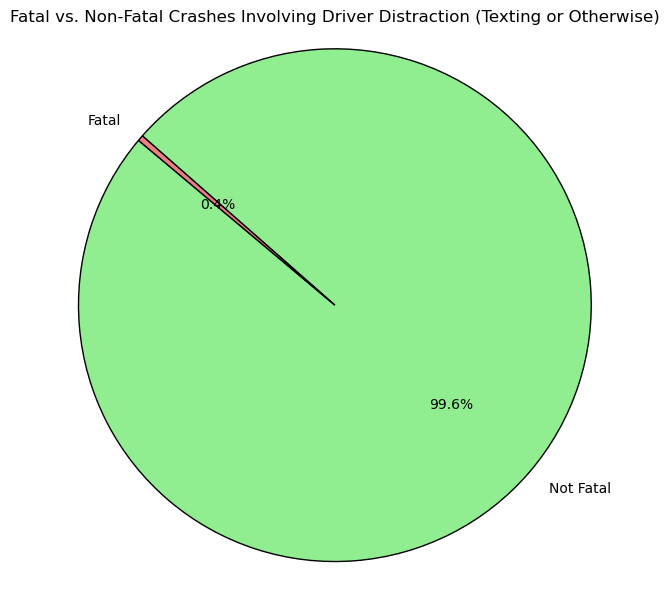

In [199]:
df['AnyDistraction'] = (
    (df['DistractedDriverInvolved'] == 'Yes') |
    (df['DriverTextingInvolved'] == 'Yes')
)

distraction_df = df[df['AnyDistraction'] == True]

distraction_fatal_counts = distraction_df['Is_Fatal'].value_counts().sort_index()

labels = ['Not Fatal', 'Fatal']
sizes = [distraction_fatal_counts.get(0, 0), distraction_fatal_counts.get(1, 0)]
colors = ['lightgreen', 'lightcoral']  # light green, forest green

plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'black'}
)

plt.title('Fatal vs. Non-Fatal Crashes Involving Driver Distraction')
plt.axis('equal')
plt.tight_layout()
plt.show()


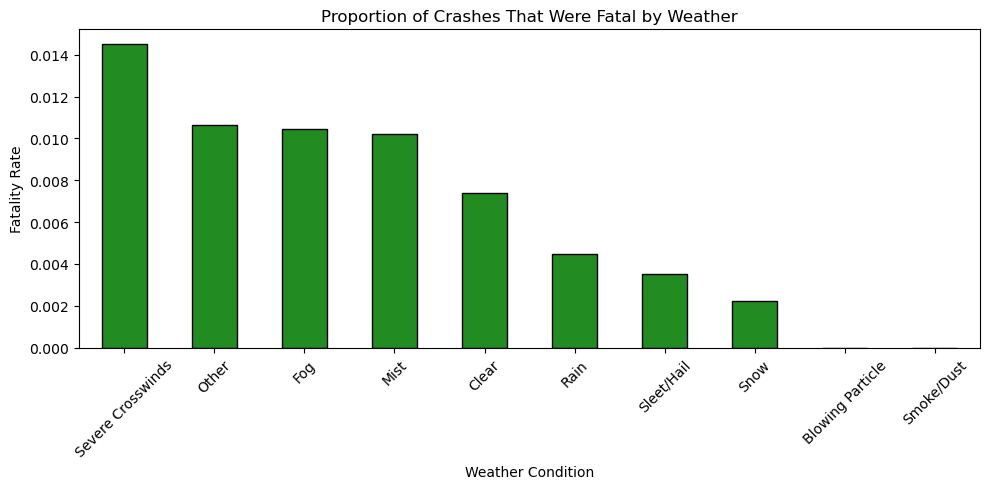

In [221]:

weather_fatal = df.groupby('WeatherCondition')['Is_Fatal'].mean().sort_values(ascending=False)
weather_fatal.index = weather_fatal.index.str.replace('No Adverse Condition (Clear/Cloud)', 'Clear')
weather_fatal.index = weather_fatal.index.str.replace('Blowing Sand, Soil, Dirt, or Snow', 'Blowing Particle')
plt.figure(figsize=(10, 5))
weather_fatal.plot(kind='bar', color='forestgreen', edgecolor='black')
plt.title('Proportion of Crashes That Were Fatal by Weather')
plt.ylabel('Fatality Rate')
plt.xlabel('Weather Condition')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [258]:
alcohol_fatal_rate = df[df['AlcoholInvolved'] == 'Yes']['Is_Fatal'].mean()
speeding_fatal_rate = df[df['SpeedRelated'] == 'Yes']['Is_Fatal'].mean()
alcohol_entries = df[df['AlcoholInvolved'] == 'Yes'].shape[0]
speeding_entries = df[df['SpeedRelated'] == 'Yes'].shape[0]
alcohol_fatalities = df[df['AlcoholInvolved'] == 'Yes']['Number_Of_Fatalities'].sum()
speeding_fatalities = df[df['SpeedRelated'] == 'Yes']['Number_Of_Fatalities'].sum()
total_fatalities = df['Number_Of_Fatalities'].sum()

print(f'Fatal Alcohol Entries: {alcohol_entries}')
print(f'Fatal Speeding Entries: {speeding_entries}')
print(f'Total Fatalities: {total_fatalities}')
print(f"Alcohol-involved fatality rate: {alcohol_fatal_rate:.4f}")
print(f"Speed-related fatality rate: {speeding_fatal_rate:.4f}")
print(f"Alcohol-related Fatalities: {alcohol_fatalities}")
print(f"Speed-related Fatalities: {speeding_fatalities}")

Fatal Alcohol Entries: 20655
Fatal Speeding Entries: 75847
Total Fatalities: 2830
Alcohol-involved fatality rate: 0.0406
Speed-related fatality rate: 0.0158
Alcohol-related Fatalities: 885
Speed-related Fatalities: 1300
